### 아이리스 품종 분류
- KNN 알고리즘 사용
- 학습용, 테스츠용 데이터셋 분리
- 테스트용 데이터셋으로 검정

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [2]:
path = '../data/iris.csv'

In [3]:
iris_data = pd.read_csv(path)
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_data.value_counts()

sepal.length  sepal.width  petal.length  petal.width  variety   
5.8           2.7          5.1           1.9          Virginica     2
6.2           2.2          4.5           1.5          Versicolor    1
              2.9          4.3           1.3          Versicolor    1
              3.4          5.4           2.3          Virginica     1
6.3           2.3          4.4           1.3          Versicolor    1
                                                                   ..
5.4           3.9          1.3           0.4          Setosa        1
                           1.7           0.4          Setosa        1
5.5           2.3          4.0           1.3          Versicolor    1
              2.4          3.7           1.0          Versicolor    1
7.9           3.8          6.4           2.0          Virginica     1
Name: count, Length: 149, dtype: int64

In [5]:
iris_data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [6]:
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
# 품종을 코드화
names = iris_data['species'].unique().tolist()
mapping = {name:idx for idx, name in enumerate(names)}
iris_data['code'] = iris_data['species'].map(mapping)
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,code
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2
149,5.9,3.0,5.1,1.8,Virginica,2


In [8]:
# 가장 잘 분류가 될 feature select
feature = iris_data[['sepal_length', 'petal_width']]
label = iris_data['code']

# 예전에는 안 했지만 이제부터는 체크하는 습관을 들이자
print(f"feature.shape: {feature.shape}, {feature.ndim}D")
print(f"label.shape: {label.shape}, {label.ndim}D")

feature.shape: (150, 2), 2D
label.shape: (150,), 1D


In [9]:
# train:test = 7:3
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=7)

In [11]:
# 마찬가지로 확인
print(f"X_train: {X_train.shape}, {X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")
print()
print(f"X_test: {X_test.shape}, {X_test.ndim}D")
print(f"y_test: {y_test.shape}, {y_test.ndim}D")

X_train: (105, 2), 2D
y_train: (105,), 1D

X_test: (45, 2), 2D
y_test: (45,), 1D


In [13]:
# model 만들고 그려보기
# optima k = 5
model = KNeighborsClassifier()

In [14]:
# model learning
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# after learning
model.classes_, model.n_samples_fit_

(array([0, 1, 2], dtype=int64), 105)

In [17]:
# 모델 성능 평가
model.score(X_test, y_test)

0.9333333333333333

In [18]:
X_train

,sepal_length,petal_width
49,5.0,0.2
65,6.7,1.4
62,6.0,1.0
111,6.4,1.9
29,4.7,0.2
...,...,...
142,5.8,1.9
92,5.8,1.2
103,6.3,1.8
67,5.8,1.0


In [55]:
setosa_idx = X_train.loc[(X_train.index < 51) & (X_train.index >= 0)].index.to_list()
versicolor_idx = X_train[(X_train.index < 101) & (X_train.index >= 51)].index.tolist()
virginica_idx = X_train[(X_train.index >= 101)].index.to_list()

In [54]:
# len(X_train[setosa_idx])
print(setosa_idx)

[49, 29, 3, 39, 13, 26, 8, 43, 15, 20, 14, 12, 47, 18, 50, 2, 30, 33, 27, 21, 7, 35, 10, 31, 16, 1, 48, 9, 4, 38, 34, 24, 44, 19, 6, 0, 42, 23, 25]


In [57]:
# 새로운 데이터를 넣어봅시다. 임의의 어떤 값 하나
new_data = pd.DataFrame([[6.0, 1]], columns=['sepal_length', 'petal_width'])
model.predict(new_data)

array([1], dtype=int64)

In [58]:
# find k-nearest data
distance, index = model.kneighbors(new_data)
print(distance, index, sep='\n')

[[0.         0.2        0.2236068  0.28284271 0.31622777]]
[[  2 103  73 101  54]]


In [60]:
neighbors = index.reshape(-1).tolist()
# X_train.loc[neighbors, :]

- 다시보니까 뭔가 이상하네...
- 위에 인덱스 값이랑 아래의 인덱스랑 다르누...
- 뭐징? 아... 인덱스가 iloc랑 loc랑 인덱스 보는 방법이 다른가봄

In [63]:
X_train.iloc[neighbors]

,sepal_length,petal_width
62,6.0,1.0
67,5.8,1.0
73,6.1,1.2
92,5.8,1.2
71,6.1,1.3


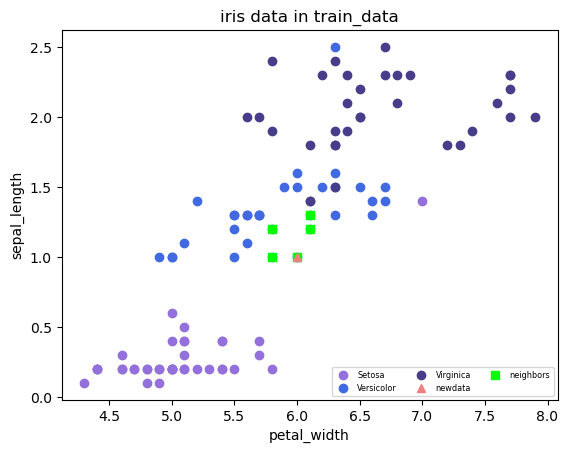

In [70]:
# 산점도로 그려보기
plt.scatter(X_train.loc[setosa_idx, 'sepal_length'], X_train.loc[setosa_idx, 'petal_width'], c='#9370DB', label='Setosa')
plt.scatter(X_train.loc[versicolor_idx, 'sepal_length'], X_train.loc[versicolor_idx, 'petal_width'], c='#4169E1', label='Versicolor')
plt.scatter(X_train.loc[virginica_idx, 'sepal_length'], X_train.loc[virginica_idx, 'petal_width'], c='#483D8B', label='Virginica')
plt.plot(new_data['sepal_length'], new_data['petal_width'], color='#F08080', linestyle='', marker='^', label='newdata')
plt.scatter(X_train.iloc[neighbors, 0], X_train.iloc[neighbors, 1], c='#00FF00', marker='s', label='neighbors')

plt.title('iris data in train_data')
plt.ylabel('sepal_length')
plt.xlabel('petal_width')
plt.legend(loc='lower right', ncol=3, fontsize='xx-small')
plt.show()